# SuperBIT Batteries 

In [107]:
from ipywidgets import HBox, FloatSlider

plt.ioff()
plt.clf()

slider = FloatSlider(
    orientation='vertical',
    value=1.0,
    min=0.02,
    max=2.0
)

fig = plt.figure(1)

x = np.linspace(0, 20, 500)

lines = plt.plot(x, np.sin(slider.value  * x))

def update_lines(change):
    lines[0].set_data(x, np.sin(change.new * x))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')

HBox([slider, fig.canvas])


In [76]:
from matplotlib import pyplot as plt
import numpy as np
from astropy import units as u
import matplotlib
from astropy import constants as apyconst
from IPython.display import Image
matplotlib.rcParams['figure.figsize'] = [10, 6]
%matplotlib widget

# import jtplot module in notebook
#from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
#jtplot.reset()

## Battery Information 

The batteries used are Lithium Ion Batteries produced by Valence a lithium werks company. The specific battery used is the U27-24XP. All information used in this document is obtained from the batteries data sheet as well as the XP user guide. Both documents can be found https://lithiumwerks.com/valence-batteries/standard-modules/xp-module/24-volt-battery-modules/#1489602799770-23a49cf1-211a. Below I list some handy information obtained from the data sheets.

In [77]:
# Set up some battery constants
batt_h = 225 * u.mm
batt_w = 172 * u.mm
batt_l = 306* u.mm
batt_mass = 19.2 * u.kg

## 0th Order Box

We want to have one inner most layer made of 1/8" almuinum, this layer will be coupled to a resistor that will be used as the primary method for heating the batteries.

We then want an insulating layer, the 0th order calculation will be with 2" foam. The main purpose here is to reduce the amount of energy needed to keep the batteries at the optimal operational temprature of 25c. We have to think about two things, 1) compramise between better insulation and space, 2) how warm the battery will get when charging due to internal resistance, need to make sure the insulation doesnt result in the battery overheating as it charges.

Finally there is a sudo optional outermost layer of 1/32" aluminum, this has two primary purposes, easily package the battery and insulation as well as enable easy mounting of the batteries to the gondola. 

#### Box Placement

The ideal scenario is to have a permanent position for the outer layer boxes within the gonodola this would require bolting the box to the wall. Some concerns with this idea is that John was hoping to use the battery placement to aid with the balancing of BIT. This concern can be handled in one of two ways: 1) have holes drilled into the wall along the entire circumfrance of BIT that way we can place the batteries along any part of the wall 2) use straps to place the batteries wherever we please. I personally would prefer the first option as it is more robust.

#### Reaction Wheel Impact

The batteries are too large for the current reaction wheel model, therefore in order to allow for space we have to take two possible outcomes into account with our calculations. 1) We can raise the reaction wheel which means we have to ensure that the batteries are low enough to allow for sufficent clearance between the reaction wheel and the middle frame 2) we can reduce the radius of the reaction wheel which will mean we have to use more motor power to achieve the same moment of inertia that was achieved previously.

### 0th Order Box Model Overview 
A simple diagram of how I envision the box will look like. A simple tutorial can be found at https://www.instructables.com/id/A-riveted-metal-box-with-lid/

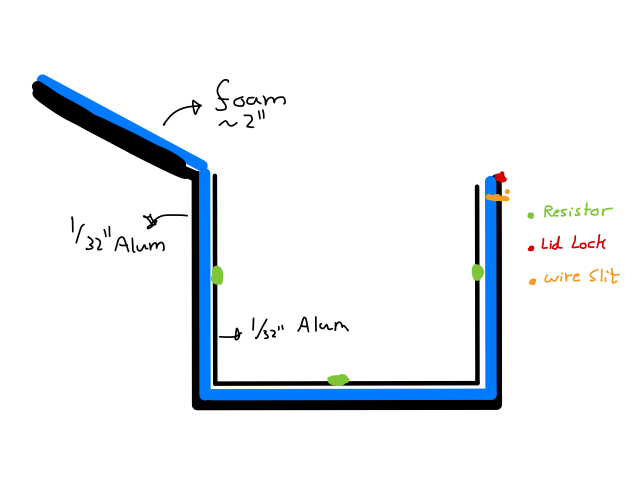

In [78]:
Image("Box0.png")

### 0th Order Battery Placement  

This is a suggested battery distributions on the floor, the distributions are to scale and are symmetric. The sizes in the image assum 2" foam with 0.25" tolerance for error and aluminum box + heating.

**A shortened reaction wheel requires arms of atmost length 333mm + 98mm. This is a reduction from 429mm + 98.** 

**This corresponds to ~ 67% of the orriginal moment of inertia (a ~ 33% reduction).**

**A raised reaction wheel requires a raise of at least 280 mm.**

For the raised reaction wheel, there are approximately 8" between the batteries and the middle frame therefore a reaction wheel would have to be fully contained within an 8" slice.

In [79]:
958*0.1/4.6

20.826086956521742

In [80]:
# Image scale
def scale(x):
    return 4.6 * x /958.23

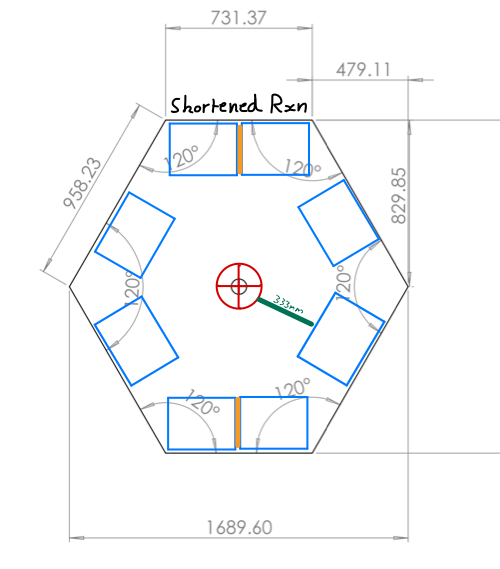

In [81]:
Image("File_001.png")

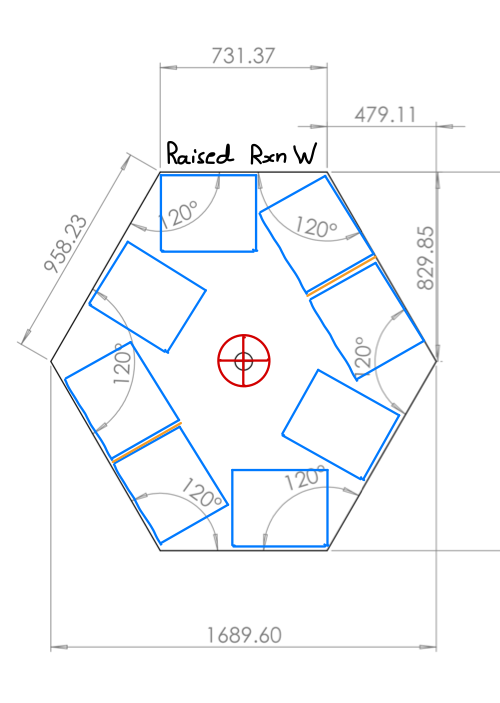

In [82]:
Image("File_002.png")

In [87]:
# Aluminum Box Constants

a_in_thickness = 0.79375 *u.mm # 1/32" 
a_out_thickness = 0.79375 *u.mm # 1/32" 

a_density = 2.7 * u.g /(u.cm)**3

foam = 50.8 * u.mm # 2"
foam_density = 0.05 * u.g /(u.cm)**3

box_h = batt_h +2*foam + 1/8 * foam
box_w = batt_w +2*foam + 1/8 * foam
box_l = batt_l +2*foam + 1/8 * foam
print(box_h,box_l,box_w)

332.95000000000005 mm 413.95000000000005 mm 279.95000000000005 mm


In [88]:
# Aluminum box mass as a function of mass 
def box_mass(foam,out = True, inner = True, foam_mass = True, battery = True):
    
    mass = 0
    
    if out:
        h = batt_h +2*foam + 1/8 * foam
        w = batt_w +2*foam + 1/8 * foam
        l = batt_l +2*foam + 1/8 * foam

        m1 = 2*h * w* a_out_thickness*a_density
        m2 = 2*h * l* a_out_thickness*a_density
        m3 = 2*w * l* a_out_thickness*a_density
        mass = (mass + m1+ m2 +m3).decompose()
        
    if inner:
        h = batt_h 
        w = batt_w 
        l = batt_l 

        m1 = 2*h * w* a_out_thickness*a_density
        m2 = 2*h * l* a_out_thickness*a_density
        m3 = w * l* a_out_thickness*a_density
        mass = (mass + m1+ m2 +m3).decompose()
        
    if battery:
        mass = mass + batt_mass
        
    if foam_mass:
        h = batt_h 
        w = batt_w 
        l = batt_l 

        m1 = 2*h * w* foam*foam_density
        m2 = 2*h * l* foam*foam_density
        m3 = 2*w * l* foam*foam_density
        mass = (mass + m1+ m2 +m3).decompose()
    return mass

In [93]:
plt.figure()
x = np.linspace(0,1,100)
plt.plot((x*foam)/25.4,box_mass(x*foam), label = "Full Box")
plt.title("Box mass vs Foam Thcikness")
plt.xlabel("foam thicknes (inch)")
plt.ylabel("total box mass (kg)");
plt.plot((x*foam)/25.4,box_mass(x*foam,out =False),label="No Outter Box")
plt.plot((x*foam)/25.4,box_mass(x*foam,inner = False, foam_mass=False),label="Only Outter Box")
plt.legend();

plt.figure()

x = np.linspace(0.5,1,100)
plt.plot((x*foam)/25.4,8*box_mass(x*foam), label = "Full Box")
plt.plot((x*foam)/25.4,8*box_mass(x*foam,out=False), label = "No Outter Box")
plt.title("8* Box mass vs Foam Thcikness")
plt.xlabel("foam thicknes (inch)")
plt.ylabel("total mass (kg)");
print(8*box_mass(foam));
print(8*box_mass(foam,out=False));
plt.legend();

FigureCanvasNbAgg()

FigureCanvasNbAgg()

176.595924674175 kg
164.70006162 kg


### Reduction Analysis 

In [90]:
def red_perc(foam):
    return (1-((428-2*foam.value+98)/(428+98))**2)*100

In [94]:
plt.figure()
x = np.linspace(0,2,100)
plt.plot((x*foam)/25.4,red_perc(x*foam), label = "Full Box")
plt.title("Moment of Inertia vs Foam Thcikness")
plt.xlabel("Foam thicknes (inch)")
plt.ylabel("Moment of Inertia Loss (%)");
plt.legend();

FigureCanvasNbAgg()

## 0th Order Thermal Calculations 

In [35]:
def get_R(foam):
    return foam.value * 5/25.4 *0.1761 * u.K * u.m**2 /u.W

def get_energy_lost(maxT,minT,foam):
    
    temp_grad = (maxT-minT)*u.K
    eng_per = temp_grad/get_R(foam)
    h = batt_h 
    w = batt_w 
    l = batt_l 
    area = (2*h*w) + (2*h*l) + (2*l*w)
    return ((temp_grad/get_R(foam))*area).to(u.W)

In [95]:
plt.figure()
x = np.linspace(0.3,2,100)
plt.plot((x*foam)/25.4,get_energy_lost(30,-20,x*foam), label = "30C Capacity = 100%")
plt.plot((x*foam)/25.4,get_energy_lost(25,-20,x*foam), label = "25C Capacity = 99%")
plt.plot((x*foam)/25.4,get_energy_lost(20,-20,x*foam), label = "20C Capacity = 98%")
plt.title("Foam Thcikness vs Power at -20C")
plt.xlabel("foam thicknes (inch)")
plt.ylabel("Power Lost (W)");
plt.legend();

plt.figure()

x = np.linspace(0.3,2,100)
E = 1.84 *u.kW * u.h
P = E/(60**2 *u.s)
plt.plot((x*foam)/25.4,get_energy_lost(30,-20,x*foam)/P.to(u.W)*100, label = "30C Capacity = 100%")
plt.plot((x*foam)/25.4,get_energy_lost(25,-20,x*foam)/P.to(u.W)*100, label = "25C Capacity = 99%")
plt.plot((x*foam)/25.4,get_energy_lost(20,-20,x*foam)/P.to(u.W)*100, label = "20C Capacity = 98%")
plt.title("Foam Thcikness vs Power at -20C")
plt.xlabel("foam thicknes (inch)")
plt.ylabel("Power Lost in Percent of Battery Power (%)");
plt.legend();

plt.figure()

x = np.linspace(0.5,1,100)
plt.plot((x*foam)/25.4,get_energy_lost(30,-20,x*foam)*60**2 * u.s*2, label = "30C")
plt.plot((x*foam)/25.4,get_energy_lost(25,-20,x*foam)*60**2 * u.s*2, label = "250C")
plt.plot((x*foam)/25.4,get_energy_lost(20,-20,x*foam)*60**2 * u.s*2, label = "20C")
plt.title("Foam Thcikness vs Power at 40 K gradient")
plt.xlabel("foam thicknes (inch)")
plt.ylabel("Energy Lost in an Hour (J)");

FigureCanvasNbAgg()

FigureCanvasNbAgg()

FigureCanvasNbAgg()

## Thermal Optimization?

Need to take data on energy produced at different rempratures at 25C below is the info. At 25C it seems like it would take 0.3% of the batteries power to maintain the temprature ?

In [66]:
need2 = []
need1 = []
need = []
for i in range(7):
    temp = i*10 - 10 
    need2.insert(i,get_energy_lost(temp,-50,foam)/P.to(u.W)*100)
    need1.insert(i,get_energy_lost(temp,-50,foam/2)/P.to(u.W)*100)
    need.insert(i,get_energy_lost(temp,-50,foam/4)/P.to(u.W)*100)

In [96]:
temps = [-10,0,10,20,30,40,50]
capc = [75,85,95,98,100,100,100]
plt.figure()
plt.plot(temps,capc,"-o", label = "Nominal Capacity")
plt.plot(temps,np.array(capc) - np.array(need2),"-", label="Capacity 2\" ")
plt.plot(temps,np.array(capc) - np.array(need1),"-", label="Capacity 1\" ")
plt.plot(temps,np.array(capc) - np.array(need),"-", label="Capacity 0.5\" ")
plt.title("Battery Capacity vs Temprature")
plt.xlabel("Temprature (C)")
plt.ylabel("Capacity (%)")
plt.legend();

FigureCanvasNbAgg()

# Summary

| Property   |1" Foam |  2" Foam |
|----------|:-------------:|------:|
| Moment of Inertia |  ~83% | ~66% |
| Wheel Raise |    15"   |   17"|
|Rxn Raise Mass Diff |~2.3 kg |    ~2.8 kg|
|Power Loss (30C) |22 W ~ 1.2% |    11 W ~ 0.6%|
